In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

import numpy as np

np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) =reuters.load_data(num_words=10000)

np.load = np_load_old

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
train_data.shape+test_data.shape

(8982, 2246)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decode_reveiew = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[10]])
decode_reveiew

557056/550378 [==============================] - 0s 0us/step


'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for key, value in enumerate(sequences):
    results[key, value] = 1.
  return results 

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# def to_one_hot(labels, dimension=46):
#   results = np.zeros((len(labels),dimension))
#   for keyss, valuess in enumerate(labels):
#     results[keyss, valuess] = 1.
#   return results 

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)


In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
x_train.dtype

dtype('float64')

In [0]:
from keras import models, layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0716 20:34:52.727056 140153656547200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 20:34:52.769236 140153656547200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 20:34:52.778020 140153656547200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0716 20:34:56.426845 140153656547200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 20:34:56.465455 140153656547200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] 
partial_y_labels = one_hot_train_labels[1000:]

In [13]:
results = model.fit(partial_x_train,
                   partial_y_labels,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

W0716 20:35:03.558508 140153656547200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 20:35:03.639956 140153656547200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 252us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.4443 - acc: 0.6888 - val_loss: 1.3499 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.0993 - acc: 0.7646 - val_loss: 1.1753 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.8730 - acc: 0.8160 - val_loss: 1.0839 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.7062 - acc: 0.8493 - val_loss: 0.9865 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.5695 - acc: 0.8792 - val_loss: 0.9415 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.4625 - acc: 0.9037 - val_loss: 0.9097 - val_acc: 0.8020


In [0]:
complete_history = results.history

In [0]:
import matplotlib.pyplot as plt

In [0]:
loss = complete_history['loss']
accuracy = complete_history['acc']

val_loss = complete_history['val_loss']
val_accuracy = complete_history['val_acc']

epochs = range(1, len(loss)+1)

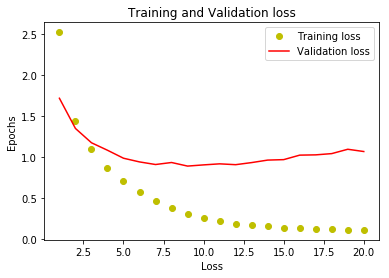

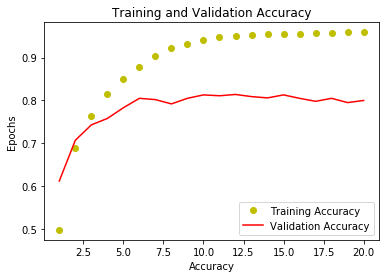

In [17]:
plt.plot(epochs, loss, 'yo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Loss')
plt.ylabel("Epochs")
plt.legend()
plt.show()

plt.plot(epochs, accuracy, 'yo', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Accuracy')
plt.ylabel("Epochs")
plt.legend()
plt.show()

In [18]:
print("Maximum validation accuracy=", np.argmax(complete_history['val_acc'])+1, "i.e ", complete_history['val_acc'][np.argmax(complete_history['val_acc'])])
print("Minimum validation accuracy=", np.argmin(complete_history['val_acc']), "i.e ", complete_history['val_acc'][np.argmin(complete_history['val_acc'])])

Maximum validation accuracy= 12 i.e  0.8139999980926513
Minimum validation accuracy= 0 i.e  0.6120000143051147


### Retraining a model from scratch with 12 epochs

In [34]:
model_scratch = models.Sequential()
model_scratch.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_scratch.add(layers.Dense(64, activation='relu'))
model_scratch.add(layers.Dense(46, activation='softmax'))

model_scratch.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_scratch.fit(partial_x_train,
                  partial_y_labels,
                  epochs=12,
                  batch_size=512,
                  verbose=0,
                  validation_data=(x_val, y_val))

results_scratch = model_scratch.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 104us/step


In [35]:
results_scratch

[1.0316409924575929, 0.7911843276936776]

In [21]:
predictions = model_scratch.predict(x_test)
predictions

array([[1.7385963e-06, 3.4943475e-06, 1.6718578e-06, ..., 1.7011570e-06,
        9.9197848e-08, 2.1826108e-06],
       [5.3080963e-04, 4.1028610e-03, 1.6075457e-03, ..., 1.5248818e-04,
        1.5637529e-07, 1.3967011e-04],
       [2.4563887e-03, 8.6669505e-01, 1.4967158e-03, ..., 3.7008969e-05,
        1.0174847e-03, 1.4962327e-04],
       ...,
       [1.4026151e-06, 3.7959977e-05, 3.9161946e-06, ..., 2.9813714e-07,
        1.4747928e-05, 1.6827208e-06],
       [2.1007052e-03, 1.8887897e-01, 1.3201048e-03, ..., 2.4943863e-04,
        1.5166734e-04, 4.0602259e-04],
       [6.0716615e-04, 6.8682975e-01, 1.4627827e-03, ..., 7.1787967e-06,
        6.3469888e-05, 8.0878854e-05]], dtype=float32)

In [22]:
predictions[0].shape

(46,)

In [23]:
np.sum(predictions[0])

1.0

In [24]:
np.argmax(predictions[0])

3

# Further experiments

### 32 units layers

In [25]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

details2 = model2.fit(partial_x_train,
                      partial_y_labels,
                      epochs=20,
                      batch_size=512,
                      verbose=0,
                      validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, one_hot_test_labels)

complete_history2 = details2.history

2246/2246 [==============================] - 0s 86us/step


In [26]:
results2

[1.111278568116661, 0.7791629563668745]

### 128 units layers

In [27]:
model3 = models.Sequential()
model3.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

details3 = model3.fit(partial_x_train,
                    partial_y_labels,
                    epochs=20,
                    batch_size=512,
                    verbose=0,
                    validation_data=(x_val, y_val))

results3 = model3.evaluate(x_test, one_hot_test_labels)

complete_history3 = details3.history

2246/2246 [==============================] - 0s 128us/step


In [28]:
results3

[1.187152025217683, 0.7898486197950154]

### Single layer

In [29]:
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

details4 = model4.fit(partial_x_train,
                    partial_y_labels,
                    epochs=20,
                    batch_size=512,
                    verbose=0,
                    validation_data=(x_val, y_val))

results4 = model4.evaluate(x_test, one_hot_test_labels)

complete_history4 = details4.history

2246/2246 [==============================] - 0s 96us/step


In [30]:
results4

[1.0516681410007358, 0.7978628673196795]

### Three layers

In [32]:
model5 = models.Sequential()
model5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))

model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

details5 = model5.fit(partial_x_train,
                    partial_y_labels,
                    epochs=20,
                    batch_size=512,
                    verbose=0,
                    validation_data=(x_val, y_val))

results5 = model5.evaluate(x_test, one_hot_test_labels)

complete_history5 = details5.history

2246/2246 [==============================] - 0s 101us/step


In [33]:
results5

[1.3967878047844606, 0.7680320569902048]

In [39]:
print("Comparision of Results: \n")
#print("Initial test =>", results)
print("Model from scratch with 12 epochs =>", results_scratch)
print("Model with 32 units =>              ", results2)
print("Model with 128 units =>             ", results3)
print("Model with one hidden layer =>      ", results4)
print("Model with three hidden layers =>   ", results5)

Comparision of Results: 

Model from scratch with 12 epochs => [1.0316409924575929, 0.7911843276936776]
Model with 32 units =>               [1.111278568116661, 0.7791629563668745]
Model with 128 units =>              [1.187152025217683, 0.7898486197950154]
Model with one hidden layer =>       [1.0516681410007358, 0.7978628673196795]
Model with three hidden layers =>    [1.3967878047844606, 0.7680320569902048]


In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [74]:
a = DataFrame(["Testing loss", results_scratch[0], results2[0], results3[0], results4[0], results5[0]],
              ["Testing Accuracy", results_scratch[1], results2[1], results3[1], results4[1], results5[1]])#, col_index=[1,2,3,4,5])
a

,0
Testing Accuracy,Testing loss
0.7911843276936776,1.03164
0.7791629563668745,1.11128
0.7898486197950154,1.18715
0.7978628673196795,1.05167
0.7680320569902048,1.39679
